In [24]:
from src.attack_network import *
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1.4 #set the value globally
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [25]:
num_samples, num_divisions = 1000, 1000
df_nodes, df_remove = random_attack_samples(num_samples, num_divisions)

In [26]:
df_nodes_mean, df_remove_mean = random_attack_mean(df_nodes, df_remove)

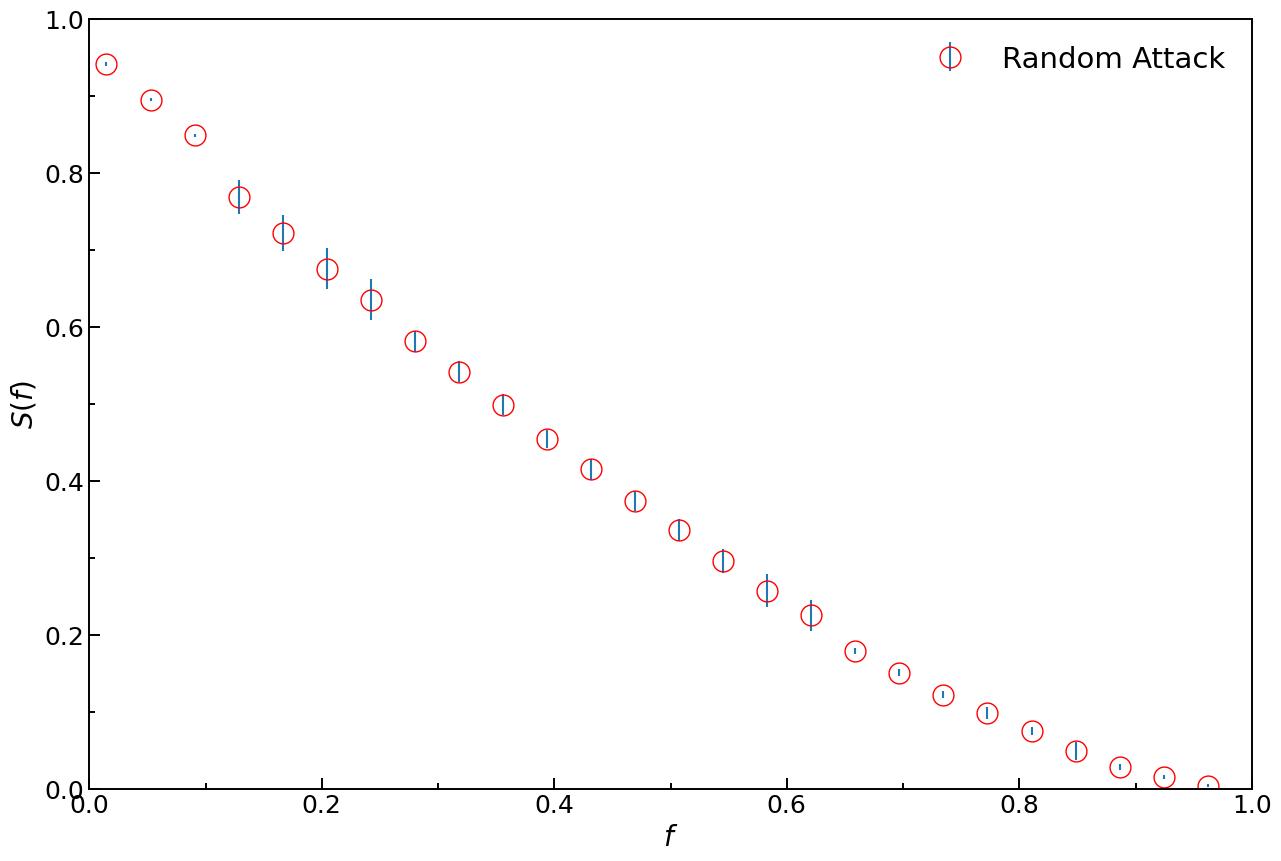

In [28]:
fig, ax = plt.subplots(figsize=(15,10))
markersize=15

ax.errorbar(df_remove_mean["N_remove"].values, df_nodes_mean["N_nodes"].values, 
            yerr=df_nodes_mean["N_error"].values,fmt="o",markersize=markersize,mfc='none',
            mec="red",label="Random Attack")
ax.set_xlabel(r"$ f $",size=20)
ax.set_ylabel(r"$S( f )$",size=20)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.xaxis.set_minor_locator(MultipleLocator(.1))
ax.yaxis.set_minor_locator(MultipleLocator(.1))
ax.tick_params(which='minor', width=1.4, length=4,direction="in",labelsize=18)
ax.tick_params(which='major', width=1.4, length=8,direction="in",labelsize=18)
ax.legend(prop={"size":21},fancybox=True, framealpha=0.0)
plt.savefig("../results/random_attack.pdf")
plt.show()